# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import pylab as plt

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [5]:
X = websites.drop(websites['Type'])  # Features of the websites.

In [6]:
y = websites['Type']  # Target: 1 = malicious ; 0 = beningn

*Tendremos que transformar aquellas columnas con datos tipo object, es decir, las columnas 'CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE' y 'WHOIS_UPDATED_DATE'.*

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [7]:
corr = websites.corr()

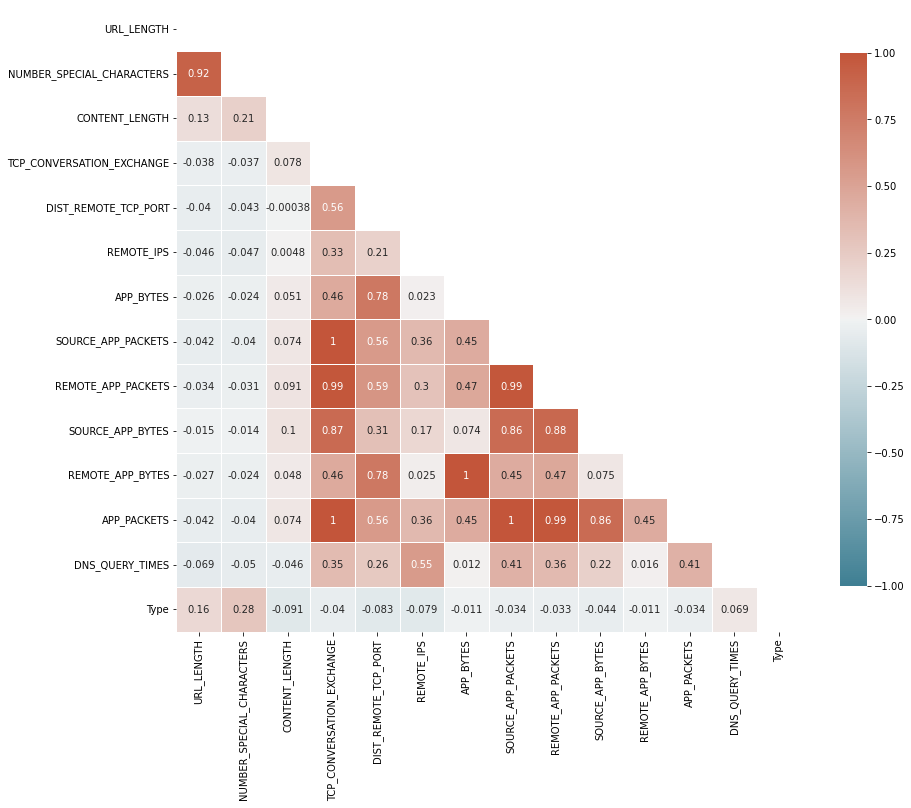

In [8]:
plt.figure(figsize=(14,14)) 

mascara = np.triu(np.ones_like(websites.corr(), dtype=bool)) # generamos la máscara para la triangular superior

color_map = sns.diverging_palette(220, 20, as_cmap=True) # Paleta de colores

sns.heatmap(websites.corr(),  
            mask = mascara,
            cmap=color_map,
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            vmin=-1,
            annot=True,
            cbar_kws={"shrink": .7
                     },# barra lateral
);

*Características eliminadas:*

*TCP_CONVERSATION_EXCHANGE --> Mantiene una correlación muy elevada con varias dimensiones. Probablemente se trate de una característica que contiene información de otras (reúne info de diferentes características en una sola).*


*APP_PACKETS --> Esta característica tiene correlación perfecta con dos caraterísticas y correlación muy elevada con otras dos características, además de otras correlaciones relativamente elevadas. Eliminamos esta dimensión y evitamos varios problemas de correlación en la misma acción.*


*REMOTE_APP_PACKETS --> Tiene correlación casi perfecta (0.99) con otras dos columnas, además de otras correlaciones relativamente elevadas. Además, entendemos que esta es una característica más específica que quellas con las que mantiene correlación (su información está de alguna manera contenida en las otras dimensiones).*


*REMOTE_APP_BYTES --> Correlación 1 con APP_BYTES. Nos quedamos con la característica más general (entendemos que engloba la información de la característica más específica). Al eliminar esta columna también evitamos problemas de correlación (0.78) con DIST_REMOTE_TCP_PORT, además de otras correlaciones relativamente elevadas.*


*NUMBER_SPECIAL_CHARACTERS --> Correlación muy elevada con URL_LENGTH. Podríamos eliminar también URL_LENGTH, pero la correlación con el resto de dimensiones es ligeramente superior en NUMBER_SPECIAL_CHARACTERS.


*SOURCE_APP_PACKETS --> Aunque una vez eliminadas las anteriores, las correlaciones de esta característica no superan el umbral de 0.9; decidimo eliminar también esta columna porque mantiene una correlación de 0.86 con SOURCE_APP_PACKETS y correlaciones relativamente elevadas con otras dimensiones que no hemos eliminado anteriormente.*

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [9]:
clean_1 = websites.drop('TCP_CONVERSATION_EXCHANGE', axis=1)

In [10]:
clean_1.drop('APP_PACKETS', axis=1, inplace=True)

In [11]:
clean_1.drop('REMOTE_APP_PACKETS', axis=1, inplace=True)

In [12]:
clean_1.drop('REMOTE_APP_BYTES', axis=1, inplace=True)

In [13]:
clean_1.drop('NUMBER_SPECIAL_CHARACTERS', axis=1, inplace=True)

In [14]:
clean_1.drop('SOURCE_APP_PACKETS', axis=1, inplace=True)

In [15]:
clean_1.columns

Index(['URL', 'URL_LENGTH', 'CHARSET', 'SERVER', 'CONTENT_LENGTH',
       'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES',
       'SOURCE_APP_BYTES', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [16]:
corr = clean_1.corr()

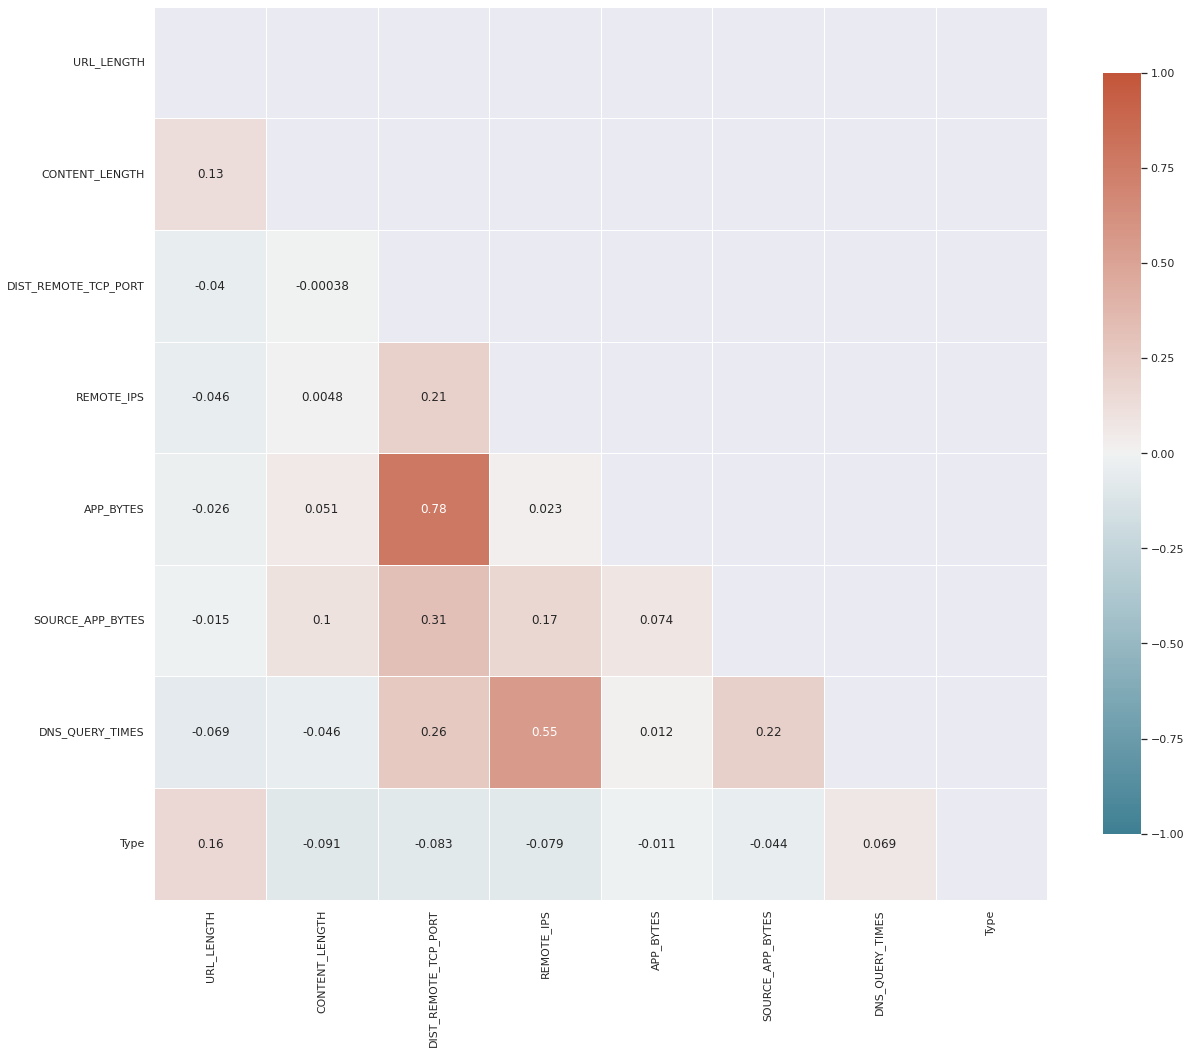

In [58]:
mascara = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior

color_map = sns.diverging_palette(220, 20, as_cmap=True) # Paleta de colores

sns.heatmap(corr,  
            mask = mascara,
            cmap=color_map,
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            vmin=-1,
            cbar_kws={"shrink": .7},# barra lateral
            annot=True
);

sns.set(rc={"figure.figsize": (20.,20.)})

*Una vez eliminadas las diferentes columna, solo encontramos una correlación relativamente preocupante (0.78). No eliminamos más columnas porque entendemos que podría ser excesivo, pero debemos tener esto en cuenta y retornar a este punto más adelante si fuese necesario.*

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [18]:
clean_1.isnull().sum()

URL                       0
URL_LENGTH                0
CHARSET                   0
SERVER                    1
CONTENT_LENGTH          812
WHOIS_COUNTRY             0
WHOIS_STATEPRO            0
WHOIS_REGDATE             0
WHOIS_UPDATED_DATE        0
DIST_REMOTE_TCP_PORT      0
REMOTE_IPS                0
APP_BYTES                 0
SOURCE_APP_BYTES          0
DNS_QUERY_TIMES           1
Type                      0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [19]:
clean_1.shape

(1781, 15)

In [20]:
812/1781

0.45592363840539024

*El 45,6% de los valores en CONTENT_LENGTH son NaN. Decidimos eliminar esta columna dada su alta proporción de valores nulos*

In [21]:
clean_1.drop('CONTENT_LENGTH', axis=1, inplace=True)

*Explormos la situación de los valores nulos en SERVER y DNS_QUERY_TIMES (un NaN en cada una).*

*SERVER es una característica con valores tipo objerct (strings), por lo que no podemos reemplazar el NaN por otro valor con sentido. Sustituiremos el valor nulo por 'unknown'.*

*DNS_QUERY_TIMES contiene valores tipo float, por lo que decidimos sustituir el NaN por la media de esta columna (entendemos que no alterará los resultados de manera significativa).*

In [22]:
clean_1.SERVER.fillna('unknown', inplace=True)

In [23]:
clean_1.DNS_QUERY_TIMES.fillna(clean_1.DNS_QUERY_TIMES.mean(), inplace=True)

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [24]:
clean_1.isnull().sum()

URL                     0
URL_LENGTH              0
CHARSET                 0
SERVER                  0
WHOIS_COUNTRY           0
WHOIS_STATEPRO          0
WHOIS_REGDATE           0
WHOIS_UPDATED_DATE      0
DIST_REMOTE_TCP_PORT    0
REMOTE_IPS              0
APP_BYTES               0
SOURCE_APP_BYTES        0
DNS_QUERY_TIMES         0
Type                    0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [25]:
clean_1.WHOIS_COUNTRY.unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [26]:
clean_1['WHOIS_COUNTRY'].replace(['Cyprus'], 'CY', inplace=True)

In [27]:
clean_1['WHOIS_COUNTRY'].replace(['us'], 'US', inplace=True)

In [28]:
clean_1['WHOIS_COUNTRY'].replace(['se'], 'SE', inplace=True)

In [29]:
clean_1['WHOIS_COUNTRY'].replace(['United Kingdom', "[u'GB'; u'UK']"], 'US', inplace=True)

In [30]:
clean_1.WHOIS_COUNTRY.unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN',
       'LU', 'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'ru', 'KY',
       'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR',
       'HK', 'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY',
       'KG'], dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

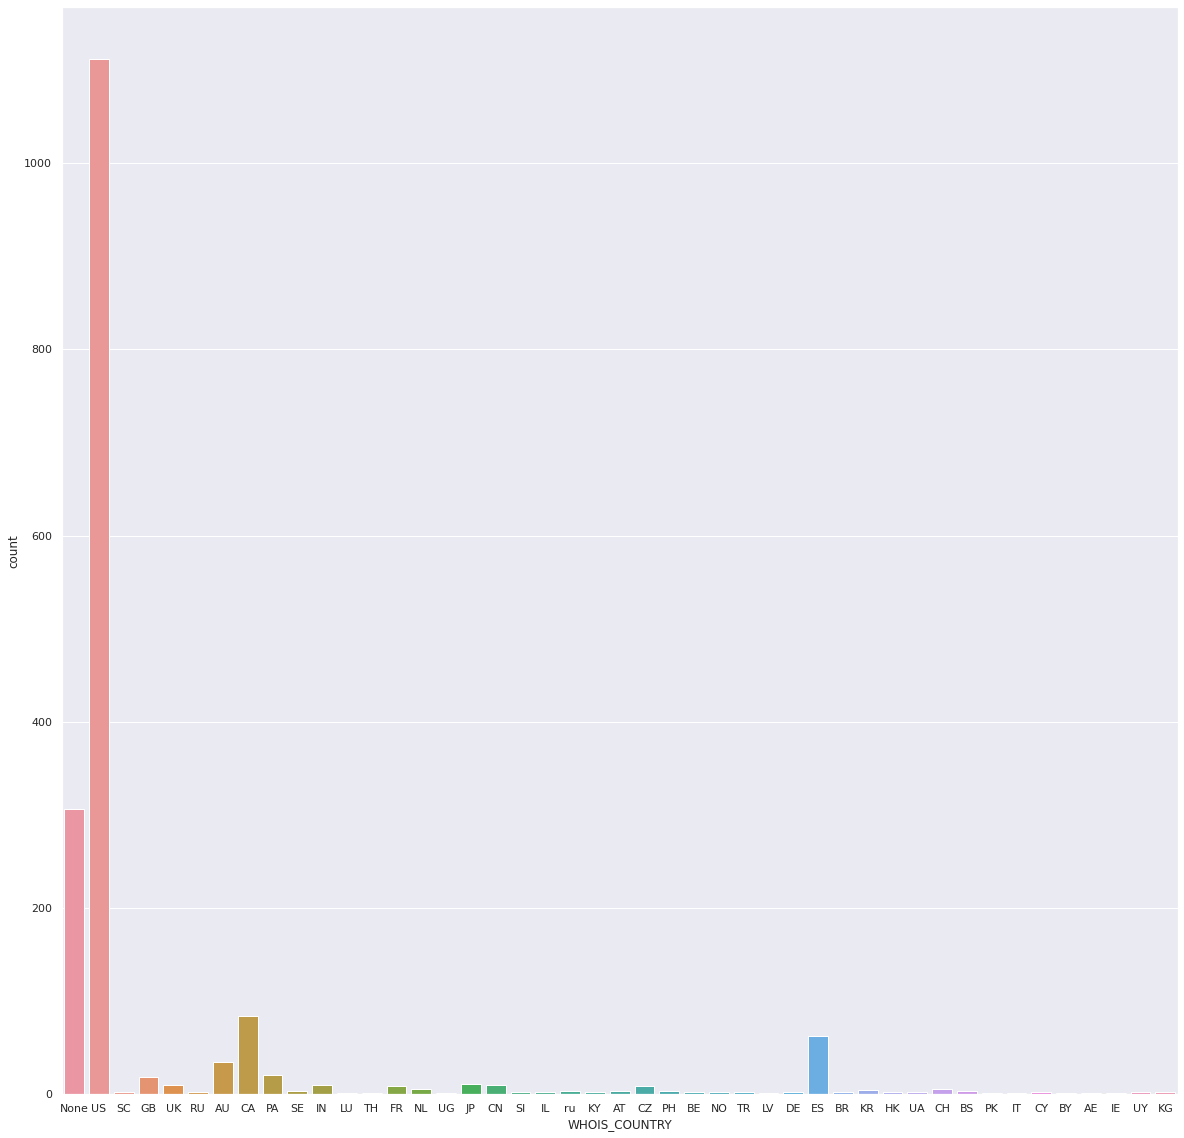

In [31]:
sns.countplot(x=clean_1.WHOIS_COUNTRY);

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [32]:
clean_1.WHOIS_COUNTRY.value_counts().head(11)

# Extraemos los 10 países más frecuentes (sin tener en cuenta 'None').

US      1112
None     306
CA        84
ES        63
AU        35
PA        21
GB        19
JP        11
IN        10
UK        10
CN        10
Name: WHOIS_COUNTRY, dtype: int64

In [33]:
top_countries = list(clean_1.WHOIS_COUNTRY.value_counts().keys()[:11])

#Generamos una lista con los 10 países más frecuentes (además de 'None').

In [34]:
# Creamos nuestra función:

def relabeling (x):
    if x not in top_countries or x == 'None':
        return 'OTHER'
    else: return x

In [35]:
clean_1.WHOIS_COUNTRY = clean_1.WHOIS_COUNTRY.apply(relabeling)

In [36]:
clean_1.WHOIS_COUNTRY.value_counts()

US       1112
OTHER     406
CA         84
ES         63
AU         35
PA         21
GB         19
JP         11
UK         10
IN         10
CN         10
Name: WHOIS_COUNTRY, dtype: int64

In [37]:
len(clean_1.WHOIS_COUNTRY.value_counts())

# 11 valores (10 países + 'OTHER')

11

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [38]:
clean_1.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1, inplace=True)

In [39]:
clean_1.columns

Index(['URL', 'URL_LENGTH', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_BYTES',
       'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [40]:
clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL                   1781 non-null   object 
 1   URL_LENGTH            1781 non-null   int64  
 2   CHARSET               1781 non-null   object 
 3   SERVER                1781 non-null   object 
 4   WHOIS_COUNTRY         1781 non-null   object 
 5   DIST_REMOTE_TCP_PORT  1781 non-null   int64  
 6   REMOTE_IPS            1781 non-null   int64  
 7   APP_BYTES             1781 non-null   int64  
 8   SOURCE_APP_BYTES      1781 non-null   int64  
 9   DNS_QUERY_TIMES       1781 non-null   float64
 10  Type                  1781 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 153.2+ KB


#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [41]:
clean_1.drop('URL', axis=1, inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [42]:
clean_1.CHARSET.unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [43]:
clean_1.SERVER.unique()[:15]

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0'], dtype=object)

![Think Hard](../think-hard.jpg)

*Encontramos patrones que se repiten en los valores. Podemos seleccionar los servidores principales y limpiar la columna en base a ellos (Apache sin contiene 'Apache', por ejemplo). El resto podemos definirlo como 'other' o algo similar.*

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [44]:
def server (x):
    if 'Apache' in x:
        return 'Apache'
    if 'Microsoft' in x:
        return 'Microsoft'
    if 'nginx' in x:
        return 'nginx'
    else:
        return 'Other'

In [45]:
clean_1.SERVER = clean_1.SERVER.apply(server)

In [46]:
clean_1.SERVER.value_counts()

Apache       643
Other        505
nginx        435
Microsoft    198
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [47]:
clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL_LENGTH            1781 non-null   int64  
 1   CHARSET               1781 non-null   object 
 2   SERVER                1781 non-null   object 
 3   WHOIS_COUNTRY         1781 non-null   object 
 4   DIST_REMOTE_TCP_PORT  1781 non-null   int64  
 5   REMOTE_IPS            1781 non-null   int64  
 6   APP_BYTES             1781 non-null   int64  
 7   SOURCE_APP_BYTES      1781 non-null   int64  
 8   DNS_QUERY_TIMES       1781 non-null   float64
 9   Type                  1781 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 139.3+ KB


In [48]:
charset = pd.get_dummies(clean_1.CHARSET, drop_first=True)

server = pd.get_dummies(clean_1.SERVER, drop_first=True)

country = pd.get_dummies(clean_1.WHOIS_COUNTRY, drop_first=True)

In [49]:
websites_def = pd.concat([clean_1, charset, server, country], axis=1)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [50]:
websites_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL_LENGTH            1781 non-null   int64  
 1   CHARSET               1781 non-null   object 
 2   SERVER                1781 non-null   object 
 3   WHOIS_COUNTRY         1781 non-null   object 
 4   DIST_REMOTE_TCP_PORT  1781 non-null   int64  
 5   REMOTE_IPS            1781 non-null   int64  
 6   APP_BYTES             1781 non-null   int64  
 7   SOURCE_APP_BYTES      1781 non-null   int64  
 8   DNS_QUERY_TIMES       1781 non-null   float64
 9   Type                  1781 non-null   int64  
 10  ISO-8859-1            1781 non-null   uint8  
 11  None                  1781 non-null   uint8  
 12  UTF-8                 1781 non-null   uint8  
 13  iso-8859-1            1781 non-null   uint8  
 14  us-ascii              1781 non-null   uint8  
 15  utf-8                

In [51]:
websites_def.drop(['CHARSET', 'SERVER', 'WHOIS_COUNTRY'], axis=1, inplace=True)

In [52]:
websites_def.shape

(1781, 28)

In [53]:
websites_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL_LENGTH            1781 non-null   int64  
 1   DIST_REMOTE_TCP_PORT  1781 non-null   int64  
 2   REMOTE_IPS            1781 non-null   int64  
 3   APP_BYTES             1781 non-null   int64  
 4   SOURCE_APP_BYTES      1781 non-null   int64  
 5   DNS_QUERY_TIMES       1781 non-null   float64
 6   Type                  1781 non-null   int64  
 7   ISO-8859-1            1781 non-null   uint8  
 8   None                  1781 non-null   uint8  
 9   UTF-8                 1781 non-null   uint8  
 10  iso-8859-1            1781 non-null   uint8  
 11  us-ascii              1781 non-null   uint8  
 12  utf-8                 1781 non-null   uint8  
 13  windows-1251          1781 non-null   uint8  
 14  windows-1252          1781 non-null   uint8  
 15  Microsoft            

In [54]:
websites_def.head()

,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type,ISO-8859-1,None,UTF-8,...,CA,CN,ES,GB,IN,JP,OTHER,PA,UK,US
0,16,0,2,700,1153,2.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,16,7,4,1230,1265,0.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,16,0,0,0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,17,22,3,3812,18784,8.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,17,2,5,4278,129889,4.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [55]:
websites_def.columns

Index(['URL_LENGTH', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES',
       'SOURCE_APP_BYTES', 'DNS_QUERY_TIMES', 'Type', 'ISO-8859-1', 'None',
       'UTF-8', 'iso-8859-1', 'us-ascii', 'utf-8', 'windows-1251',
       'windows-1252', 'Microsoft', 'Other', 'nginx', 'CA', 'CN', 'ES', 'GB',
       'IN', 'JP', 'OTHER', 'PA', 'UK', 'US'],
      dtype='object')

In [59]:
from sklearn.model_selection import train_test_split as tts

X = websites_def.drop('Type', axis=1)
y = websites_def.Type
train, test = tts(websites_def)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1424, 27), (357, 27), (1424,), (357,))

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [60]:
from sklearn.linear_model import LogisticRegression

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [70]:
log_reg = LogisticRegression() # Inicializamos la clase.

In [76]:
log_reg.fit(X_train, y_train) # Entrenamos el modelo.

LogisticRegression()

In [81]:
prediction = log_reg.predict(X_test)

In [82]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [ ]:
# Your code here:



What are your thoughts on the performance of the model? Write your conclusions below.

In [ ]:
# Your conclusions here:



#### Our second algorithm is is DecisionTreeClassifier

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `DecisionTreeClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where max_depth=3

In [ ]:
# Your code here:



To test your model, compute the predicted probabilities, decide 0 or 1 using a threshold of 0.5 and print the confusion matrix as well as the accuracy score (on the test set!)

In [ ]:
# Your code here:



#### We'll create another DecisionTreeClassifier model with max_depth=5. 
Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [ ]:
# Your code here:



Did you see an improvement in the confusion matrix when increasing max_depth to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [ ]:
# Your conclusions here:



# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here